In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid')

In [2]:
CONFIGS = {
    'R19-2905': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20200925_barcode01_R19-2905/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211223_Lis_WGA_barcode09_R19-2905/stats.txt'
    },
    'R20-0026': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20200925_barcode02_R20-0026/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211223_Lis_WGA_barcode10_R20-0026/stats.txt'
    },
    'R20-0030': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20211209_Lis_barcode07_R20-0030/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211220_Lis_WGA_barcode05_R20-0030/stats.txt'
    },
    'R20-0088': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20200925_barcode04_R20-0088/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211228_Lis_WGA_barcode01_R20-0088/stats.txt'
    },
    'R20-0127': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20200925_barcode05_R20-0127/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211228_Lis_WGA_barcode02_R20-0127/stats.txt'
    },
    'R20-0131': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20200925_barcode06_R20-0131/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211227_Lis_WGA_barcode11_R20-0131/stats.txt'
    },
    'R20-0140': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20211209_Lis_barcode08_R20-0140/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211220_Lis_WGA_2_barcode06_R20-0140/stats.txt'
    },
    'R20-0145': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20211209_Lis_barcode09_R20-0145/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211220_Lis_WGA_barcode07_R20-0145/stats.txt'
    },
    'R20-0148': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20211209_Lis_barcode10_R20-0148/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211220_Lis_WGA_2_barcode08_R20-0148/stats.txt'
    },
    'R20-0150': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20200925_barcode10_R20-0150/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211227_Lis_WGA_barcode12_R20-0150/stats.txt'
    },
    'R20-0158': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20200925_barcode11_R20-0158/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211229_Lis_WGA_barcode03_R20-0158/stats.txt'
    },
    'R20-0160': {
        'WGS': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wgs-2/20200925_barcode12_R20-0160/stats.txt',
        'WGA': '/media/GenomicResearch/Issue/20210909_estimate_nanopore_depth/wga/20211229_Lis_WGA_barcode04_R20-0160/stats.txt'
    },
}

In [3]:
def plot_data_trend(x, y, data, ax, **kwarg):
    xlabel = kwarg['xlabel']
    ylabel = kwarg['ylabel']
    
    legend_labels = ['WG_ONT', 'WGA_ONT']
    palette = ['tab:red', 'tab:blue']
    
    sns.lineplot(x=x, y=y, data=data, hue='method', ax=ax, lw=2, estimator=np.median, palette=palette)
    sns.scatterplot(x=x, y=y, data=data, hue='method', ax=ax, palette=palette)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.legend(legend_labels, loc='center', frameon=False, fontsize=10, ncol=2, bbox_to_anchor=(0.5, 1.08))

In [4]:
total_df = pd.DataFrame()
for sample, config in CONFIGS.items():
    for method, filepath in config.items():
        df = pd.read_csv(filepath, sep='\t')
        df['method'] = method
        df['sample'] = sample
        df['depth'] = df['depth'].astype(str)
        total_df = pd.concat([total_df, df], ignore_index=True)
total_df['segment_median_qscore'] = total_df['segment_median_qscore'].apply(lambda x: 60 if x > 60 else x)
total_df['N50'] = total_df['N50'].div(1000000).round(2)

In [ ]:
# data = total_df.groupby('sample').get_group('R20-0160')

# fig, ax = plt.subplots(figsize=(8, 4), dpi=87)
# plot_data_trend(x='depth', y='cgmlst_distance', data=data, ax=ax, xlabel='Depth', ylabel='cgMLST distance')
# ax.set_title('R20-0160', fontsize=20, y=1.13)

In [8]:
outpath = Path('/media/GenomicResearch/Issue/20220215_modification_paper_data/Comparison/segment_median_qscore')

for sample, group in total_df.groupby('sample'):
    fig, ax = plt.subplots(figsize=(8, 4), dpi=87, sharex=True)
    plot_data_trend(x='depth', y='segment_median_qscore', data=group, ax=ax, hue='method', xlabel='Depth', ylabel='Q score')
    ax.set_title(sample, fontsize=20, y=1.13)
    plt.close()
    fig.savefig(outpath/(sample + '.png'), dpi=300, facecolor='w', bbox_inches='tight')

In [10]:
total_df.to_csv('/media/GenomicResearch/Issue/20220215_modification_paper_data/Comparison/data.tsv', sep='\t', index=False)

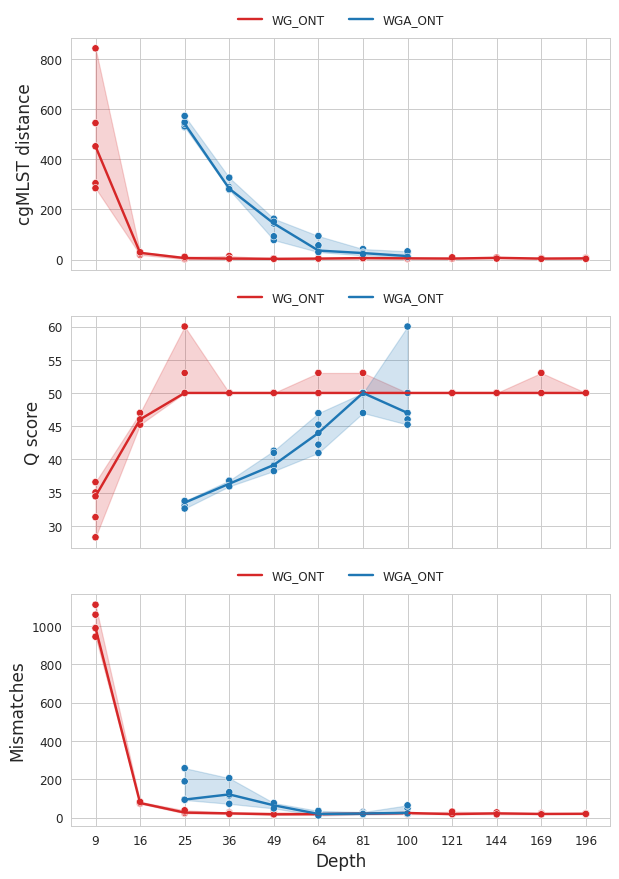

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12), dpi=87, sharex=True)
plt.subplots_adjust(hspace=.2)

ax = axes[0]
plot_data_trend(x='depth', y='cgmlst_distance', data=group, ax=ax, xlabel='Depth', ylabel='cgMLST distance')

ax = axes[1]
plot_data_trend(x='depth', y='segment_median_qscore', data=group, ax=ax, xlabel='Depth', ylabel='Q score')

ax = axes[2]
plot_data_trend(x='depth', y='num_mismatches', data=group, ax=ax, xlabel='Depth', ylabel='Mismatches')

# ax = axes[3]
# plot_data_trend(x='depth', y='N50', data=total_df, ax=ax, hue='method', xlabel='Depth', ylabel=r'N50$_{(MB)}$')

# fig.suptitle('R20-0145', fontsize=20, y=0.92)